<a href="https://colab.research.google.com/github/subalasingh/Feature-Engineering/blob/main/Handling%20missing%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Missing data:**
Missing data occurs when one or more values are absent in a dataset, resulting in incomplete information and potentially harming the accuracy and dependability of our models. This can happen for various reasons, such as measurement errors, data corruption, or simply incomplete data collection.

###**Different types of missing data**

####1.***Missing completely at rendom (MCAR):***

In MCAR, the probability of data being missing is the same for all the observations. In this case, there is no relationship between the missing data and any other values observed or unobserved (the data which is not recorded) within the given dataset. That is, missing values are completely independent of other data. There is no pattern.

####2.***Missing at rendom (MAR):***
MAR data means that the reason for missing values can be explained by variables on which you have complete information, as there is some relationship between the missing data and other values/data. In this case, the data is not missing for all the observations. It is missing only within sub-samples of the data, and there is some pattern in the missing values.

####3.***Missing Not at Random (MNAR):***

MNAR is the most challenging type of missing data to deal with. It occurs when the probability of a data point being missing is related to the missing value itself. This means that the reason for the missing data is informative and directly associated with the variable that is missing.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Titanic_train_data.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 3 columns have missing values: Age, Cabin, Embarked.
*Here, Age and Cabin missing values have some relation so they are not MCAR. However, Embarked (from which place person have been picked up) is a pecfect example of MCAR.*

In [7]:
#The percentage of missing values against the total values
mis_value_percent = 100 * df.isnull().sum() / len(df)
print(mis_value_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [8]:
#Records where Embark is missing
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
#MNAR example - cabin and Age, Cabin and Survived
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)


In [10]:
##Find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

77% of the cabin records are missing.

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [12]:
## Evaluating the mean of the cabin missing values for the people who survived and who not survived
## Comparing cabin null values with the Survived data

df.groupby(['Survived'])['cabin_null'].mean()

,cabin_null
Survived,
0,0.876138
1,0.602339


For survived people, 60% of the cabin data is missing, however, for the not survived people, 87% of the data is missing.

Hence, Survived and Cabin missing values have some relation and is a pecfect example of MNAR.

###**Handling missing values in continuous data**
1. Mean/ Median Imputation
2. Random Sample Imputation
3. Capturing NAN values with a new Feature
4. End of distribution Imputation / Outliers Imputation
5. Arbitrary Value Imputation

###1. Mean/ Median Imputation

In [13]:
df = pd.read_csv('/content/Titanic_train_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
# percentage of missing values
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [15]:
# Creating a function to impute nan values with mean/median
#imputeMode = Mean/Median
def impute_nan(df,feature,imputeMode):
  df[feature+"_imputed"] = df[feature].fillna(imputeMode)

In [16]:
median =df['Age'].median()
median

28.0

In [17]:
# Call function to impute median value
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_imputed
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [18]:
#Difference in std of feature Age and Age_imputed
print(df['Age'].std())
print(df['Age_imputed'].std())

14.526497332334044
13.019696550973194


There is minor differnce in standard deviation of actual feature and imputed feature.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

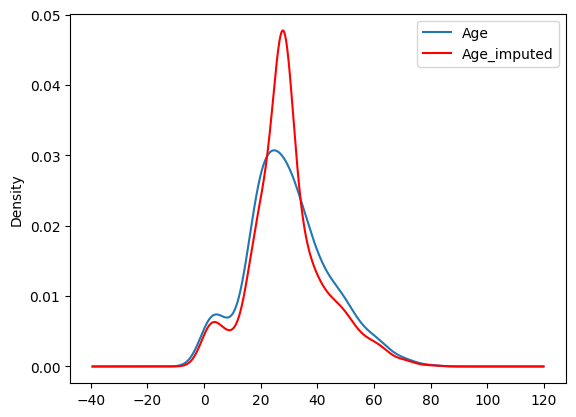

In [20]:
# Checking distribution of Age and Age_imputed
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax=ax)
df['Age_imputed'].plot(kind='kde', ax=ax, color= 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

Distribution of imputed feature(Age_imputed) is raised in center due to median imputation.

###2. Random Sample Imputation

In [21]:
data = pd.read_csv('/content/Titanic_train_data.csv', usecols = ['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
#Count of null values
data.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [23]:
#percentage of null values
100*data.isnull().mean()

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [24]:
# select random sample
data['Age'].dropna().sample() #using dropna() to avoid selection of missing observation

,Age
819,10.0


In [25]:
# Replacing all the nan values with a fixed random observation. In output, we have index value with the fixed replaced random observation.
data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0) #random_state = 0 is used to fix the random observation for each missing values.

,Age
423,28.00
177,50.00
305,0.92
292,36.00
889,26.00
...,...
539,22.00
267,25.00
352,15.00
99,34.00


In [26]:
data[data['Age'].isnull()].index  #index of all the missing values

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [27]:
# Creating a function to impute nan values with a random observation for any feature

def impute_nan_random(df,feature):
  df[feature+"_random"] = df[feature]   #create copy of the feature
  random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state = 0) # Replacing all the nan values with a fixed random observation
  # pandas need to have same index in order to merge the random_sample with Copy of the feature(feature_random)
  random_sample_index = df[df[feature].isnull()].index  #index of all the missing values
  df.loc[df[feature].isnull(),feature+'_random'] = random_sample


In [28]:
impute_nan_random(data,'Age')
data.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


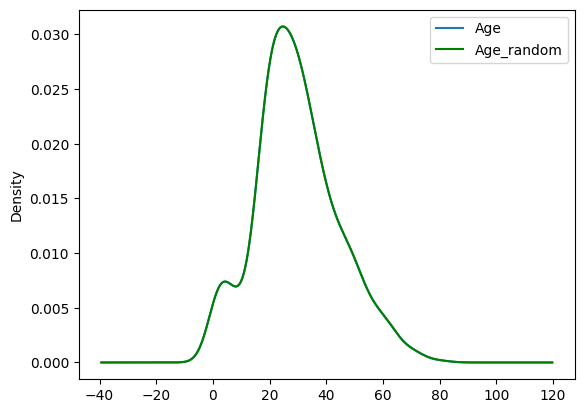

In [29]:
# Checking distribution of Age and Age_imputed
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind = 'kde', ax=ax)
data['Age_random'].plot(kind='kde', ax=ax, color= 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

Random sample imputation helps to preserve the distribution of original feature.

###3. Capturing NAN values with a new Feature

In [30]:
dF = pd.read_csv('/content/Titanic_train_data.csv', usecols = ['Age','Fare','Survived'])
dF.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
dF['Age_NAN'] = np.where(dF['Age'].isnull(),1,0)
dF.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


###4. End of distribution Imputation/ Outlier

In [32]:
df1 = pd.read_csv('/content/Titanic_train_data.csv', usecols = ['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

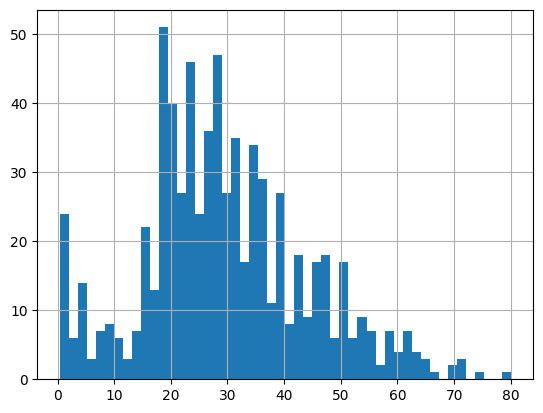

In [33]:
# Indentifying the distribution of the feature
df1.Age.hist(bins=50)

In [34]:
# As the distribution is right skewed, extreme values = (mean+3std)
extreme = df1.Age.mean() + 3*df1.Age.std()
extreme

73.27860964406095

<Axes: xlabel='Age'>

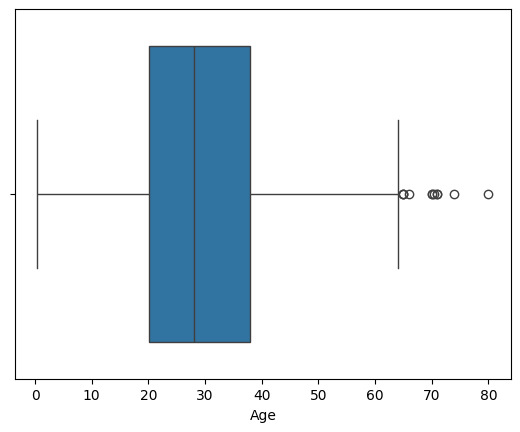

In [35]:
#Examining the outliers
import seaborn as sns
sns.boxplot(x =df1['Age'])

In [36]:
#Creating a function to impute NAN with extreme values in a new column
def impute_nan_end_distribution(df, feature,extreme):
  df[feature+"_end_distribution"] = df[feature].fillna(extreme)

In [37]:
#calling function to impute nan values
impute_nan_end_distribution(df1,'Age',extreme)
df1.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

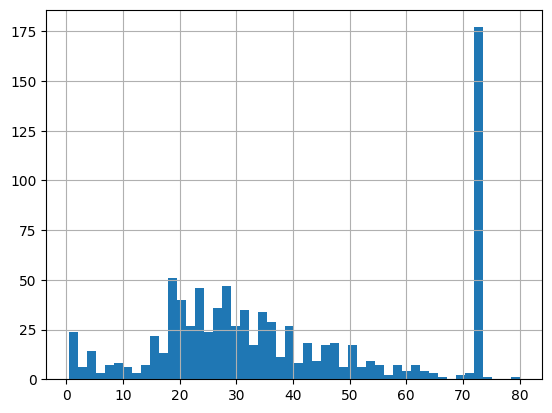

In [38]:
#Validating the overall charateristics of the imputed feature
df1['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

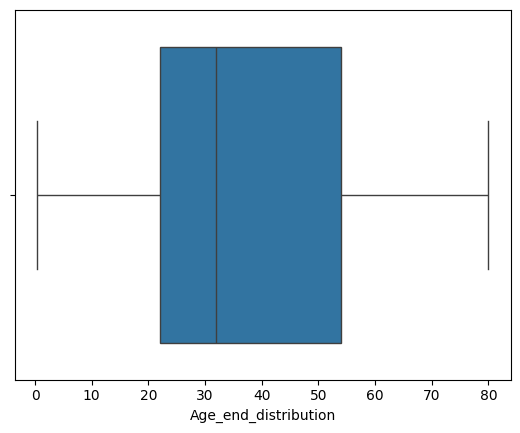

In [39]:
sns.boxplot(x=df1['Age_end_distribution'])

###5. Arbitrary Value Imputation
This technique was derived from Kaggle competition. It replace NAN by ab arbitrary value

In [40]:
df2 = pd.read_csv('/content/Titanic_train_data.csv', usecols = ['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


***How to choose an arbitrary value?***
- It should not be more frequently present in the feature.

Generally we take arbitrary value as extreme outlier. for each and every feature it can be different.

**Zero (0)**: Often used when missing values are assumed to represent absence or a default state.

**Negative Value**: A placeholder like -1 is sometimes used, especially if the data set's valid values are all positive.

**Large Placeholder (e.g., 999)**: Used when missing values are to be flagged or indicate a special case, and it's clear that no valid value should naturally equal that placeholder.

In [41]:
#Creating a function to impute NAN with an arbitraty value in a new column
def impute_nan_arbitrary(df, feature):
  df[feature+"_zeros"] = df[feature].fillna(0)
  df[feature+"_hundreds"] = df[feature].fillna(100)

In [42]:
#calling function to impute nan values
impute_nan_arbitrary(df2,'Age')
df2.head(10)

,Survived,Age,Fare,Age_zeros,Age_hundreds
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


###Handle missing values in Categroical data
1. Frequent Category Imputation/ Mode Imputation
2. Arbitrary Category Imputation

###1. Frequent Category Imputation/ Mode Imputation

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv('/content/Loan_train_data.csv')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
data1= pd.read_csv('/content/Loan_train_data.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
# Total missing values
data1.isnull().sum()

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [46]:
# Percentage of missing values
100* data1.isnull().mean().sort_values(ascending=True)

,0
SalePrice,0.000000
BsmtQual,2.534247
GarageType,5.547945
FireplaceQu,47.260274


<Axes: xlabel='BsmtQual'>

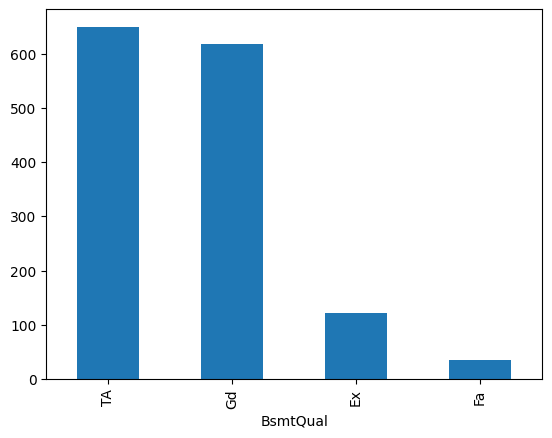

In [47]:
#Visualize the frequency of each category of the feature 'BsmtQual'
data1['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

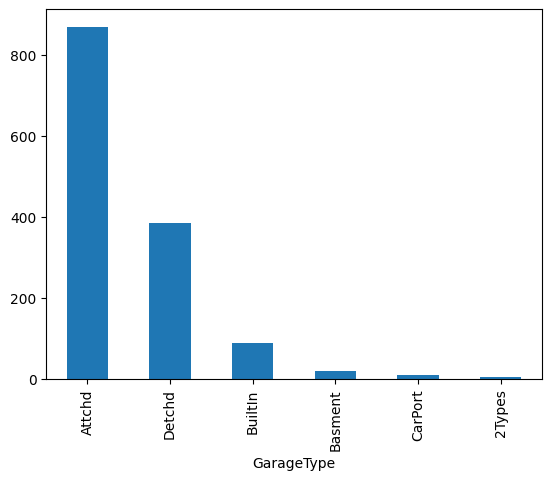

In [48]:
#Visualize the frequency of each category of the feature 'GarageType'
data1['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

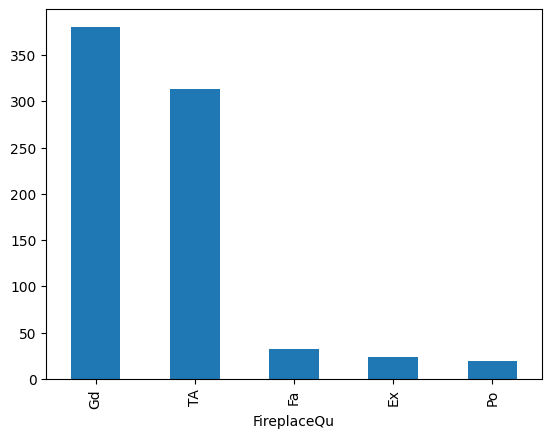

In [49]:
#Visualize the frequency of each category of the feature 'FireplaceQu'
data1['FireplaceQu'].value_counts().plot.bar()

In [50]:
#Most frequent value for the feature
data1.BsmtQual.mode()[0]

'TA'

In [51]:
#Creating a function to impute NAN with mode
def impute_nan_mode(df,feature):
  mode = data1[feature].mode()[0]
  df[feature].fillna(mode,inplace=True)

In [52]:
#calling function to impute nan values
for feature in ['BsmtQual','GarageType','FireplaceQu']:
  impute_nan_mode(data1,feature)
data1.head(20)

<ipython-input-51-2062c1aef40f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mode,inplace=True)


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


###2. Arbitrary Category Imputation

In [53]:
data2= pd.read_csv('/content/Loan_train_data.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [56]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(data2,feature)
data2.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [57]:
data2=data2.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
data2.head(10)


,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,Missing,Attchd
6,307000,Ex,Gd,Attchd
7,200000,Gd,TA,Attchd
8,129900,TA,TA,Detchd
9,118000,TA,TA,Attchd
